

---


# **Exploratory Data Analysis and Prediction of Antimicrobial Resistance in Klebsiella Pneumoniae Using Genomic Data.**


---



# 1- Introduction

**Background**

- **Antimicrobial Resistance (AMR):** A major global health threat, leading to treatment failures and increased mortality. Emerges when bacteria evolve mechanisms to resist the effects of antibiotics.
- **Klebsiella pneumoniae:** A significant pathogen responsible for hospital-acquired infections like pneumonia, bloodstream infections, and UTIs. Known for rapidly acquiring and spreading resistance genes.
- **Meropenem Resistance:** Carbapenem antibiotics, like meropenem, are last-resort drugs for treating multi-drug-resistant infections. Resistance to meropenem poses a critical challenge in treating Klebsiella pneumoniae infections.
- **Genomic Data Analysis:** Whole-genome sequencing provides insights into resistance mechanisms and gene patterns. Offers opportunities for identifying novel resistance markers.
- **Machine Learning in AMR Prediction:** Enables pattern recognition in large datasets, enhancing prediction accuracy for resistance phenotypes. Helps in tailoring antibiotic usage and developing targeted interventions.
- **Focus on Pakistan:** Limited research on AMR patterns in the region despite a high burden of antibiotic misuse. Understanding local resistance trends is essential for effective healthcare strategies.


**Aim:** The project aims to analyze genomic data to find patterns and understand antimicrobial resistance (AMR) in Klebsiella pneumoniae through exploratory data analysis (EDA) and machine learning (ML) prediction models, with a specific focus on studying data from Pakistan to better understand local AMR trends.

**Dataset:**
* Klebsiella pneumoniae: Meropenem AMR Genomic Data
* Comprehensive Genomic Analysis of Meropenem Resistance in Klebsiella pneumoniae.
* https://www.kaggle.com/datasets/derrickdaniel/klebsiella-meropenem-amr-genomic-data

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('Klebsiella_Meropenem_AMR_Genomics.csv')
df.head()

,Genome ID,AAC(3)-IId,AAC(3)-IIe,AAC(3)-IV,AAC(3)-Ia,AAC(6')-29a,AAC(6')-33,AAC(6')-IIa,AAC(6')-IIc,AAC(6')-Ib-cr,...,Testing Standard,Testing Standard Year,Computational Method,Computational Method Version,Computational Method Performance,Evidence,Source,PubMed,SEQUENCE,Resistant Phenotype
0,573.13031,0,1,0,0,0,0,0,0,1,...,CLSI,2017.0,NaN,NaN,NaN,Laboratory Method,NaN,28512093;28776045,573.13031,Susceptible
1,573.13032,0,1,0,0,0,0,0,0,1,...,CLSI,2017.0,NaN,NaN,NaN,Laboratory Method,NaN,28512093;28776045,573.13032,Susceptible
2,573.13033,0,1,0,0,0,0,0,0,0,...,CLSI,2017.0,NaN,NaN,NaN,Laboratory Method,NaN,28512093;28776045,573.13033,Susceptible
3,573.13034,0,0,0,0,0,0,0,0,0,...,CLSI,2017.0,NaN,NaN,NaN,Laboratory Method,NaN,28512093;28776045,573.13034,Resistant
4,573.13035,0,1,0,0,0,0,0,0,0,...,CLSI,2017.0,NaN,NaN,NaN,Laboratory Method,NaN,28512093;28776045,573.13035,Susceptible


# 2-	Data Preprocessing

###Dividing Data into 3 Parts

- Gene Data
- Non Essential Metadata and Essential Metadata
- Targe Data

In [ ]:
# Gene Data: iloc for AAC(3)-IId to tetW
print('Gene Data:')

aac_iId_iloc = df.columns.get_loc('AAC(3)-IId')
print(f"The iloc for 'AAC(3)-IId' is: {aac_iId_iloc}")

tetW_iloc = df.columns.get_loc('tetW')
print(f"The iloc for 'tetW' is: {tetW_iloc}")

print("-" * 40)

# Non Essential Meta Data: iloc for Genome Name_x to Plasmids

print('Non Essential Meta Data:')

Genome_Name_x_iloc = df.columns.get_loc('Genome Name_x')
print(f"The iloc for 'Genome Name_x' is: {Genome_Name_x_iloc}")

Plasmids_iloc = df.columns.get_loc('Plasmids')
print(f"The iloc for 'Plasmids' is: {Plasmids_iloc}")

print("-" * 40)

# Essential Meta Data: Find column iloc for Contigs to SEQUENCE

print('Essential Meta Data:')

Contigs_iloc = df.columns.get_loc('Contigs')
print(f"The iloc for 'Contigs' is: {Contigs_iloc}")

SEQUENCE_iloc = df.columns.get_loc('SEQUENCE')
print(f"The iloc for 'SEQUENCE' is: {SEQUENCE_iloc}")

print("-" * 40)

# Target Data:iloc for Resistant Phenotype

print('Target Data:')

resistant_phenotype_iloc = df.columns.get_loc('Resistant Phenotype')
print(f"The iloc for 'Resistant Phenotype' is: {resistant_phenotype_iloc}")

Gene Data:
The iloc for 'AAC(3)-IId' is: 1
The iloc for 'tetW' is: 195
----------------------------------------
Non Essential Meta Data:
The iloc for 'Genome Name_x' is: 196
The iloc for 'Plasmids' is: 244
----------------------------------------
Essential Meta Data:
The iloc for 'Contigs' is: 245
The iloc for 'SEQUENCE' is: 300
----------------------------------------
Target Data:
The iloc for 'Resistant Phenotype' is: 301


In [ ]:
# Gene Dataframe
gene_data = df.iloc[:, 1:196]

# Non Essential Meta Dataframe
Non_Essential_meta_data = df.iloc[:, 196:245]

# Essential Meta Dataframe
meta_data = df.iloc[:, 245:301]

# Target Dataframe
target_data = df.iloc[:, 301:]

## 1- Gene Data

In [ ]:
gene_data.head()

,AAC(3)-IId,AAC(3)-IIe,AAC(3)-IV,AAC(3)-Ia,AAC(6')-29a,AAC(6')-33,AAC(6')-IIa,AAC(6')-IIc,AAC(6')-Ib-cr,AAC(6')-Ib10,...,sul2,sul3,tet(A),tet(B),tet(C),tet(D),tet(G),tet(W/N/W),tetM,tetW
0,0,1,0,0,0,0,0,0,1,0,...,1,0,1,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,1,0,...,1,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
# information about the gene data
gene_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1580 entries, 0 to 1579
Columns: 195 entries, AAC(3)-IId to tetW
dtypes: int64(195)
memory usage: 2.4 MB


In [ ]:
# null values in the gene data
print("\nNull Values in Gene Data:")
print(gene_data.isnull().sum())


Null Values in Gene Data:
AAC(3)-IId     0
AAC(3)-IIe     0
AAC(3)-IV      0
AAC(3)-Ia      0
AAC(6')-29a    0
              ..
tet(D)         0
tet(G)         0
tet(W/N/W)     0
tetM           0
tetW           0
Length: 195, dtype: int64


In [ ]:
#null values greater than 0 in the gene data
null_counts = gene_data.isnull().sum()
null_counts[null_counts > 0]

,0


## 2- MetaData

In [ ]:
meta_data.head()

,Contigs,Size,GC Content,Contig L50,Contig N50,TRNA,RRNA,Mat Peptide,CDS,Coarse Consistency,...,Vendor,Testing Standard,Testing Standard Year,Computational Method,Computational Method Version,Computational Method Performance,Evidence,Source,PubMed,SEQUENCE
0,71,5443843,57.35,10,202176,72,9,NaN,5343,99.4,...,NaN,CLSI,2017.0,NaN,NaN,NaN,Laboratory Method,NaN,28512093;28776045,573.13031
1,92,5413989,57.39,13,132946,59,6,NaN,5320,99.3,...,NaN,CLSI,2017.0,NaN,NaN,NaN,Laboratory Method,NaN,28512093;28776045,573.13032
2,77,5374225,57.34,11,165568,74,5,NaN,5312,99.5,...,NaN,CLSI,2017.0,NaN,NaN,NaN,Laboratory Method,NaN,28512093;28776045,573.13033
3,151,5562854,57.16,16,130070,67,10,NaN,5637,99.5,...,NaN,CLSI,2017.0,NaN,NaN,NaN,Laboratory Method,NaN,28512093;28776045,573.13034
4,100,5406672,57.33,12,140783,65,5,NaN,5353,99.4,...,NaN,CLSI,2017.0,NaN,NaN,NaN,Laboratory Method,NaN,28512093;28776045,573.13035


In [ ]:
#most esential column in metadata: GC Content , CDS, Isolation Source, Isolation Country

essential_columns = ['GC Content', 'CDS', 'Isolation Source', 'Isolation Country']
meta_data = meta_data[essential_columns]


meta_data.head()

,GC Content,CDS,Isolation Source,Isolation Country
0,57.35,5343,DRAIN,USA
1,57.39,5320,URINE,USA
2,57.34,5312,WOUND,USA
3,57.16,5637,URINE,USA
4,57.33,5353,URINE,USA


In [ ]:
#null values in each column of metadata
null_counts = meta_data.isnull().sum()
null_counts

,0
GC Content,0
CDS,0
Isolation Source,19
Isolation Country,5


In [ ]:
#rows with null values for specific column
isolation_country_null_rows = meta_data[meta_data['Isolation Country'].isnull()].index.tolist()

print("Rows with null values for 'Isolation Country':", isolation_country_null_rows)

Rows with null values for 'Isolation Country': [1315, 1468, 1469, 1470, 1471]


In [ ]:
# Accessing Geographic Group and Geographic Location for specific indices
indices_to_access = [1315, 1468, 1469, 1470, 1471]

selected_data = df.loc[indices_to_access, ['Geographic Group', 'Geographic Location']]
print(selected_data)

     Geographic Group Geographic Location
1315              NaN                 NaN
1468              NaN                 NaN
1469              NaN                 NaN
1470              NaN                 NaN
1471              NaN                 NaN


In [ ]:
#Replacing null value in other metadata with ''Unknown''
meta_data.fillna('Unknown', inplace=True)

null_counts = meta_data.isnull().sum()
null_counts

,0
GC Content,0
CDS,0
Isolation Source,0
Isolation Country,0


## 3- Target Data

In [ ]:
target_data.head()

,Resistant Phenotype
0,Susceptible
1,Susceptible
2,Susceptible
3,Resistant
4,Susceptible


In [ ]:
# information about the target data
target_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1580 entries, 0 to 1579
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Resistant Phenotype  1580 non-null   object
dtypes: object(1)
memory usage: 12.5+ KB


In [ ]:
# null values in the target data
print("\nNull Values in Target Data:")
print(target_data.isnull().sum())


Null Values in Target Data:
Resistant Phenotype    0
dtype: int64


In [ ]:
# mapping the values
target_data['Resistant Phenotype'] = target_data['Resistant Phenotype'].map({'Resistant': 1, 'Susceptible': 0})

# Now, 'Resistant Phenotype' column contains 1 for 'Resistant' and 0 for 'Susceptible'
target_data.head()

,Resistant Phenotype
0,0
1,0
2,0
3,1
4,0


## Final Datasets

In [ ]:
ml_data = pd.concat([gene_data, target_data], axis=1)
ml_data.head()

,AAC(3)-IId,AAC(3)-IIe,AAC(3)-IV,AAC(3)-Ia,AAC(6')-29a,AAC(6')-33,AAC(6')-IIa,AAC(6')-IIc,AAC(6')-Ib-cr,AAC(6')-Ib10,...,sul3,tet(A),tet(B),tet(C),tet(D),tet(G),tet(W/N/W),tetM,tetW,Resistant Phenotype
0,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
eda_data = pd.concat([gene_data, meta_data, target_data], axis=1)
eda_data.head()

,AAC(3)-IId,AAC(3)-IIe,AAC(3)-IV,AAC(3)-Ia,AAC(6')-29a,AAC(6')-33,AAC(6')-IIa,AAC(6')-IIc,AAC(6')-Ib-cr,AAC(6')-Ib10,...,tet(D),tet(G),tet(W/N/W),tetM,tetW,GC Content,CDS,Isolation Source,Isolation Country,Resistant Phenotype
0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,57.35,5343,DRAIN,USA,0
1,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,57.39,5320,URINE,USA,0
2,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,57.34,5312,WOUND,USA,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,57.16,5637,URINE,USA,1
4,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,57.33,5353,URINE,USA,0


# 3-	Exploratory Data Analysis (EDA)

In [ ]:
eda_data.head()

,AAC(3)-IId,AAC(3)-IIe,AAC(3)-IV,AAC(3)-Ia,AAC(6')-29a,AAC(6')-33,AAC(6')-IIa,AAC(6')-IIc,AAC(6')-Ib-cr,AAC(6')-Ib10,...,tet(D),tet(G),tet(W/N/W),tetM,tetW,GC Content,CDS,Isolation Source,Isolation Country,Resistant Phenotype
0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,57.35,5343,DRAIN,USA,0
1,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,57.39,5320,URINE,USA,0
2,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,57.34,5312,WOUND,USA,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,57.16,5637,URINE,USA,1
4,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,57.33,5353,URINE,USA,0


In [ ]:
# checking how many isolates are resitant in this data and non resistant
resistant_count = eda_data[eda_data['Resistant Phenotype'] == 1].shape[0]
non_resistant_count = eda_data[eda_data['Resistant Phenotype'] == 0].shape[0]

print(f"Number of resistant isolates: {resistant_count}")
print(f"Number of non-resistant isolates: {non_resistant_count}")

Number of resistant isolates: 526
Number of non-resistant isolates: 1054


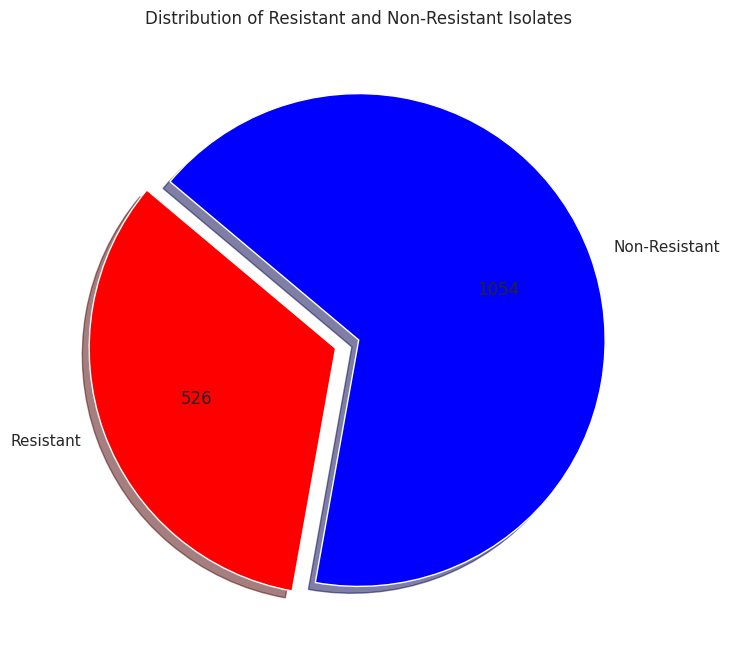

In [ ]:
# Data for pie chart
labels = ['Resistant', 'Non-Resistant']
sizes = [resistant_count, non_resistant_count]
colors = ['red', 'blue']
explode = (0.1, 0)

# Function to show numbers inside the pie chart
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:d}".format(absolute)

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct=lambda pct: func(pct, sizes), shadow=True, startangle=140)
plt.title('Distribution of Resistant and Non-Resistant Isolates')
plt.show()



##- Resistance Gene Patterns

#### Most Common Combinations of Resistance Genes

In [ ]:
# column for the number of resistance genes in each isolate
resistance_gene_columns = [col for col in eda_data.columns if col not in ["GC Content", "CDS", "Isolation Source", "Isolation Country", "Resistant Phenotype"]]
eda_data["Resistance Gene Count"] = eda_data[resistance_gene_columns].sum(axis=1)

# unique rows of the resistance gene subset
common_combinations = eda_data[resistance_gene_columns].value_counts()

# common combinations to a DataFrame for easier manipulation
common_combinations_df = common_combinations.reset_index()
common_combinations_df.columns = resistance_gene_columns + ["Count"]

# new column for combination labels
common_combinations_df["Combination"] = ["Combination " + str(i+1) for i in range(common_combinations_df.shape[0])]

print(common_combinations_df.shape)
common_combinations_df

<ipython-input-170-58e5389282f7>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  common_combinations_df = common_combinations.reset_index()
<ipython-input-170-58e5389282f7>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  common_combinations_df = common_combinations.reset_index()
<ipython-input-170-58e5389282f7>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.

(783, 197)


<ipython-input-170-58e5389282f7>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  common_combinations_df = common_combinations.reset_index()
<ipython-input-170-58e5389282f7>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  common_combinations_df = common_combinations.reset_index()
<ipython-input-170-58e5389282f7>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.

,AAC(3)-IId,AAC(3)-IIe,AAC(3)-IV,AAC(3)-Ia,AAC(6')-29a,AAC(6')-33,AAC(6')-IIa,AAC(6')-IIc,AAC(6')-Ib-cr,AAC(6')-Ib10,...,tet(A),tet(B),tet(C),tet(D),tet(G),tet(W/N/W),tetM,tetW,Count,Combination
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,35,Combination 1
1,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,29,Combination 2
2,0,1,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,27,Combination 3
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,27,Combination 4
4,0,1,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,23,Combination 5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,Combination 779
779,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,Combination 780
780,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,Combination 781
781,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,Combination 782


<ipython-input-171-f03a75523150>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_combinations, x="Combination", y="Count", palette="viridis")


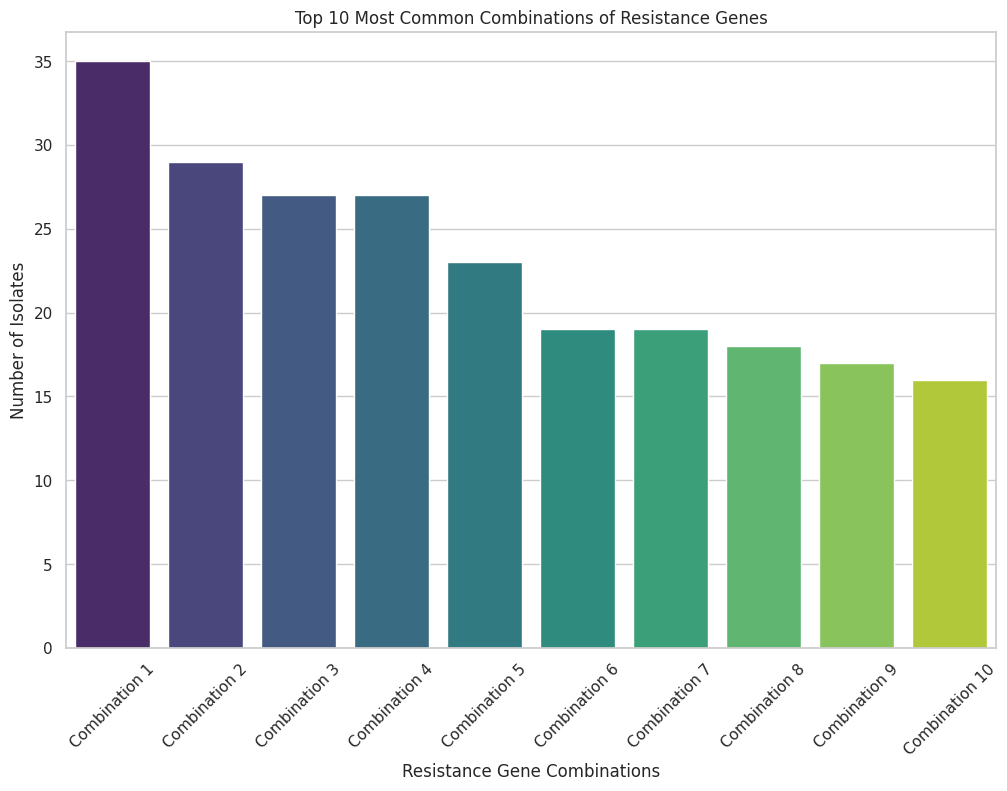

In [ ]:
# top 10 most common combinations
top_combinations = common_combinations_df.head(10)

# stacked bar chart to visualize the top combinations
plt.figure(figsize=(12, 8))
sns.barplot(data=top_combinations, x="Combination", y="Count", palette="viridis")
plt.title('Top 10 Most Common Combinations of Resistance Genes')
plt.xlabel('Resistance Gene Combinations')
plt.ylabel('Number of Isolates')
plt.xticks(rotation=45)
plt.show()

The top combinations observed across the dataset are:
- **Combination 1:**  observed in 35 isolates.
- **Combination 2:**  observed in 29 isolates.
- **Combination 3:** observed in 27 isolates.
- **Combination 4:** observed in 27 isolates.
- **Combination 5:** observed in 23 isolates.
- **Combination 6:** observed in 19 isolates.
- **Combination 7:** observed in 19 isolates.
- **Combination 8:** observed in 18 isolates.
- **Combination 9:** observed in 17 isolates.
- **Combination 10:** observed in 16 isolates.



In total, there are **783 unique combinations** of resistance genes observed across the dataset.

 By categorizing the combinations based on the number of isolates, we gain insights into the prevalence and distribution of these resistance gene patterns across the dataset.

In [ ]:
common_combinations_df.head(10)

,AAC(3)-IId,AAC(3)-IIe,AAC(3)-IV,AAC(3)-Ia,AAC(6')-29a,AAC(6')-33,AAC(6')-IIa,AAC(6')-IIc,AAC(6')-Ib-cr,AAC(6')-Ib10,...,tet(A),tet(B),tet(C),tet(D),tet(G),tet(W/N/W),tetM,tetW,Count,Combination
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,35,Combination 1
1,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,29,Combination 2
2,0,1,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,27,Combination 3
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,27,Combination 4
4,0,1,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,23,Combination 5
5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,19,Combination 6
6,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,19,Combination 7
7,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,18,Combination 8
8,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,17,Combination 9
9,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,16,Combination 10


##- Genomic Features

### Correlation Between GC Content and Resistance Phenotypes

Traditional correlation methods, like Pearson correlation, are designed for continuous variables. Applying them directly to categorical data can give misleading results.

**Alternative Methods to Consider**

**Point Biserial Correlation:**

Suitable for binary categorical variables (like 'Resistant Phenotype' which is 0 or 1) and continuous variables (like GC Content). It's a special case of Pearson correlation.

In [ ]:
from scipy.stats import pointbiserialr

# Extract the relevant columns
gc_content = eda_data['GC Content']
resistant_phenotype = eda_data['Resistant Phenotype']

# Calculating the Point Biserial Correlation
correlation, p_value = pointbiserialr(resistant_phenotype, gc_content)

# results
print(f'Point Biserial Correlation coefficient: {correlation:.4f}')
print(f'p-value: {p_value:.4f}')


Point Biserial Correlation coefficient: -0.0785
p-value: 0.0018


Based on the Point Biserial Correlation analysis between GC Content and resistance phenotypes, the findings are as follows:

- The Point Biserial Correlation coefficient between GC Content and resistant phenotype is **-0.0785**.
- The p-value associated with this correlation is **0.0018**.

### Interpretation

**Correlation Coefficient:** The value of **-0.0785** indicates a weakly negative correlation between GC Content and resistance phenotypes. This suggests that there is little to no meaningful relationship between GC Content and whether an isolate is resistant or non-resistant.

**P-value:** The p-value of **0.0018** is statistically significant, indicating that the observed correlation, although weak, is unlikely to have occurred by chance.

### Conclusion

The strength of correlation between GC Content and resistance phenotypes is very weak. Therefore, variations in GC Content do not significantly influence the resistance phenotypes of the isolates. Other factors are likely to play a more substantial role in determining resistance phenotypes.


### Analysis of CDS Counts and Resistance Patterns


In [ ]:
# relevant columns
CDS = eda_data['CDS']
resistant_phenotype = eda_data['Resistant Phenotype']

# Calculating the Point Biserial Correlation
correlation, p_value = pointbiserialr(resistant_phenotype, CDS)

# results
print(f'Point Biserial Correlation coefficient: {correlation:.4f}')
print(f'p-value: {p_value:.4f}')


Point Biserial Correlation coefficient: 0.2559
p-value: 0.0000


In [ ]:
# Resistance patterns vs. CDS counts
cds_resistance_summary = eda_data.groupby(pd.cut(eda_data['CDS'], bins=5))['Resistant Phenotype'].mean()
cds_resistance_summary

<ipython-input-175-917f44564834>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cds_resistance_summary = eda_data.groupby(pd.cut(eda_data['CDS'], bins=5))['Resistant Phenotype'].mean()


,Resistant Phenotype
CDS,
"(4987.295, 5330.0]",0.179612
"(5330.0, 5671.0]",0.313503
"(5671.0, 6012.0]",0.481884
"(6012.0, 6353.0]",0.666667
"(6353.0, 6694.0]",0.333333


<ipython-input-176-f2e7669b4241>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cds_resistance_summary = eda_data.groupby(pd.cut(eda_data['CDS'], bins=5))['Resistant Phenotype'].mean()


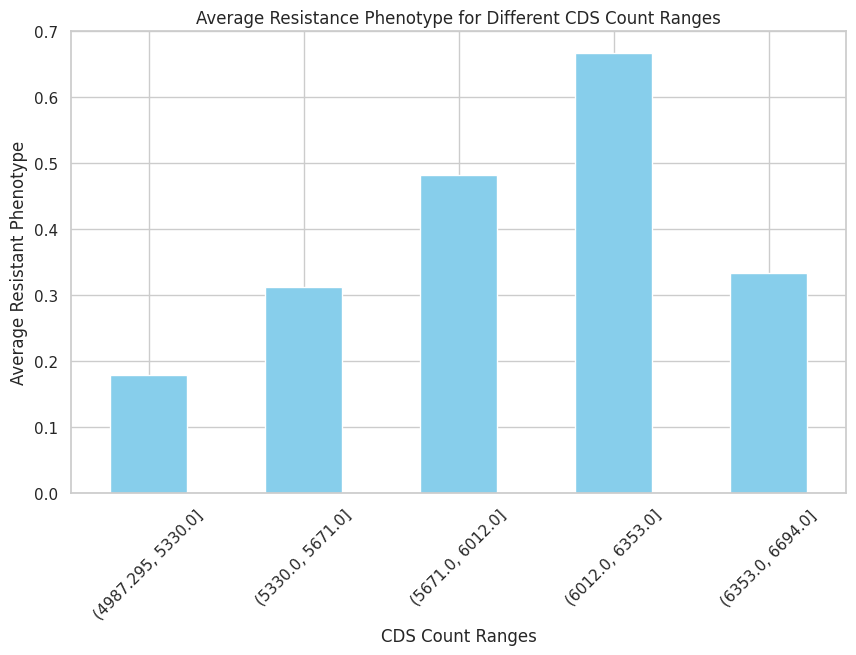

In [ ]:
# average resistance phenotype for different CDS count ranges
cds_resistance_summary = eda_data.groupby(pd.cut(eda_data['CDS'], bins=5))['Resistant Phenotype'].mean()

#bar plot
plt.figure(figsize=(10, 6))
cds_resistance_summary.plot(kind='bar', color='skyblue')
plt.title('Average Resistance Phenotype for Different CDS Count Ranges')
plt.xlabel('CDS Count Ranges')
plt.ylabel('Average Resistant Phenotype')
plt.xticks(rotation=45)
plt.show()


Based on the provided analysis, here are the findings regarding the relationship between CDS counts and resistance patterns:

**Correlation Analysis:**

- The Point Biserial Correlation coefficient between CDS counts and resistant phenotype is **0.2559**.
- The p-value associated with this correlation is **0.0000**.

### Interpretation

**Correlation Coefficient:** The value of **0.2559** indicates a weak positive correlation between CDS counts and resistance phenotypes. This suggests that higher CDS counts are associated with an increased likelihood of resistance, but the strenghth of likelihood is well and correlation does not mean causation.

**P-value:** The p-value of **0.0000** is statistically significant, indicating that the observed correlation is highly unlikely to have occurred by chance.

### Resistance Patterns vs. CDS Counts

The average resistance phenotype for different CDS count ranges is as follows:

- **CDS Range (4987.295, 5330.0]:** Approximately **17.96%** resistance.
- **CDS Range (5330.0, 5671.0]:** Approximately **31.35%** resistance.
- **CDS Range (5671.0, 6012.0]:** Approximately **48.19%** resistance.
- **CDS Range (6012.0, 6353.0]:** Approximately **66.67%** resistance.
- **CDS Range (6353.0, 6694.0]:** Approximately **33.33%** resistance.

### Conclusion

Isolates with higher CDS counts tend to exhibit higher resistance patterns. The positive correlation coefficient and the statistically significant p-value support the observation that as CDS counts increase, the likelihood of resistance also increases. This trend is evident from the higher average resistance rates observed in the higher CDS count ranges. Therefore, isolates with higher CDS counts do show different (higher) resistance patterns compared to those with lower CDS counts, but this relationship is of weak strength.

## Source Of Isolotion

### Most common isolation sources (e.g., urine, wound) for resistant vs. non-resistant isolates?


In [ ]:
# unique values in the 'Isolation Source' column
unique_isolation_sources = eda_data['Isolation Source'].unique()

unique_isolation_sources

array(['DRAIN', 'URINE', 'WOUND', 'RESPIRATORY', 'PUS', 'TISSUE',
       'ABSCESS', 'BLOOD', 'ULCER', 'CSF', 'BONE', 'SITE', 'urine',
       'FLUID', 'BILE', 'Urine Cath', 'Blood', 'Bodily fluid', 'HWARE',
       'respiratory', 'ASPIRATE', 'GRAFT', 'Unknown', 'Rectal Swab',
       'rectal', 'Sputum', 'Tracheal Aspirate', 'Urine', 'bile', 'BAL',
       'wound', 'sputum', 'bronchial washings',
       'bronchial alveolar lavage', 'Wound', 'SURVEILLANCE', 'EXUDATE',
       'Fluid_Ascitic', 'Blood_whole', 'Fluid_Synovial', 'stool', 'Stool',
       'Bronchial secretion', 'blood culture',
       'Peritoneal dialysis catheter', 'Endotracheal tube', 'blood',
       'cerebrospinal fluid', 'Wound Swab', 'Tracheal Secretions', 'Pus',
       'Ear swab', 'Cerebrospinal fluid', 'Central venous catheter tip',
       'Plueral fluid'], dtype=object)

Duplicate values in the 'Isolation Source' column that have the same meaning but are represented with different variations:

**URINE**
- 'URINE'
- 'urine'
- 'Urine'
- 'Urine Cath'

**RESPIRATORY**
- 'RESPIRATORY'
- 'respiratory'

**WOUND**
- 'WOUND'
- 'wound'
- 'Wound'
- 'Wound Swab'

**BLOOD**
- 'BLOOD'
- 'Blood'
- 'Blood_whole'
- 'blood'
- 'blood culture'

**PUS**
- 'PUS'
- 'Pus'

**CSF (Cerebrospinal Fluid)**
- 'CSF'
- 'cerebrospinal fluid'
- 'Cerebrospinal fluid'

**SPUTUM**
- 'Sputum'
- 'sputum'

**BILE**
- 'BILE'
- 'bile'

**RECTAL**
- 'Rectal Swab'
- 'rectal'

**STOOL**
- 'stool'
- 'Stool'


In [ ]:
#function to standardize the Isolation Source values
def standardize_isolation_source(source):
    source = source.lower()
    if 'urine' in source:
        return 'Urine'
    elif 'respiratory' in source:
        return 'Respiratory'
    elif 'wound' in source:
        return 'Wound'
    elif 'blood' in source or 'blood_whole' in source or 'blood culture' in source:
        return 'Blood'
    elif 'pus' in source:
        return 'Pus'
    elif 'csf' in source or 'cerebrospinal fluid' in source:
        return 'CSF'
    elif 'sputum' in source:
        return 'Sputum'
    elif 'bile' in source:
        return 'Bile'
    elif 'rectal' in source:
        return 'Rectal'
    elif 'stool' in source:
        return 'Stool'
    else:
        return source.capitalize()


eda_data['Isolation Source'] = eda_data['Isolation Source'].apply(standardize_isolation_source)
unique_isolation_sources = eda_data['Isolation Source'].unique()
unique_isolation_sources


array(['Drain', 'Urine', 'Wound', 'Respiratory', 'Pus', 'Tissue',
       'Abscess', 'Blood', 'Ulcer', 'CSF', 'Bone', 'Site', 'Fluid',
       'Bile', 'Bodily fluid', 'Hware', 'Aspirate', 'Graft', 'Unknown',
       'Rectal', 'Sputum', 'Tracheal aspirate', 'Bal',
       'Bronchial washings', 'Bronchial alveolar lavage', 'Surveillance',
       'Exudate', 'Fluid_ascitic', 'Fluid_synovial', 'Stool',
       'Bronchial secretion', 'Peritoneal dialysis catheter',
       'Endotracheal tube', 'Tracheal secretions', 'Ear swab',
       'Central venous catheter tip', 'Plueral fluid'], dtype=object)

In [ ]:
# number of isolates for each isolation source
isolation_source_counts = eda_data['Isolation Source'].value_counts()

# the top 5 most common isolation sources
top_5_sources = isolation_source_counts.nlargest(5)
top_5_sources


,count
Isolation Source,
Urine,820
Respiratory,260
Blood,173
Wound,97
Tissue,30


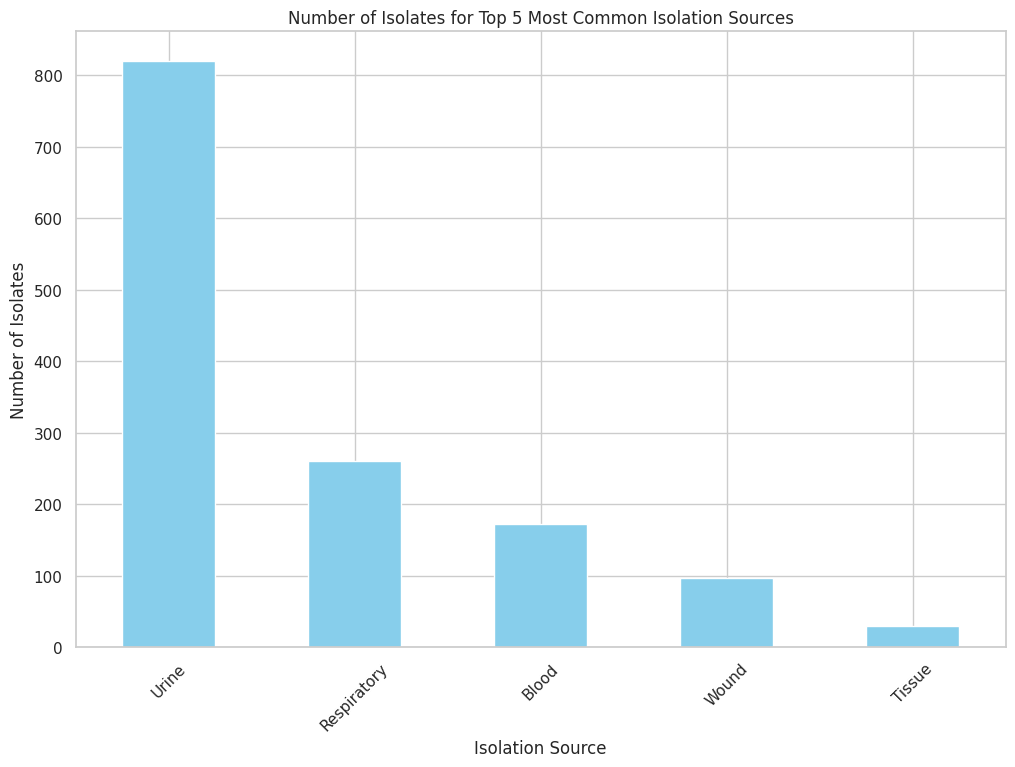

In [ ]:
# Plotting the results
plt.figure(figsize=(12, 8))
top_5_sources.plot(kind='bar', color='skyblue')
plt.title('Number of Isolates for Top 5 Most Common Isolation Sources')
plt.xlabel('Isolation Source')
plt.ylabel('Number of Isolates')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# isolation sources for resistant vs. non-resistant isolates
source_resistance_summary = eda_data.groupby(['Isolation Source', 'Resistant Phenotype']).size().unstack(fill_value=0)

# resistance rates for each isolation source in percentage
source_resistance_rates = source_resistance_summary.div(source_resistance_summary.sum(axis=1), axis=0) * 100

# top 5 most common isolation sources
top_5_sources = source_resistance_summary.sum(axis=1).nlargest(5).index
top_5_resistance_rates = source_resistance_rates.loc[top_5_sources]
top_5_resistance_rates

Resistant Phenotype,0,1
Isolation Source,,
Urine,67.560976,32.439024
Respiratory,71.153846,28.846154
Blood,67.630058,32.369942
Wound,74.226804,25.773196
Tissue,76.666667,23.333333


<Figure size 1200x800 with 0 Axes>

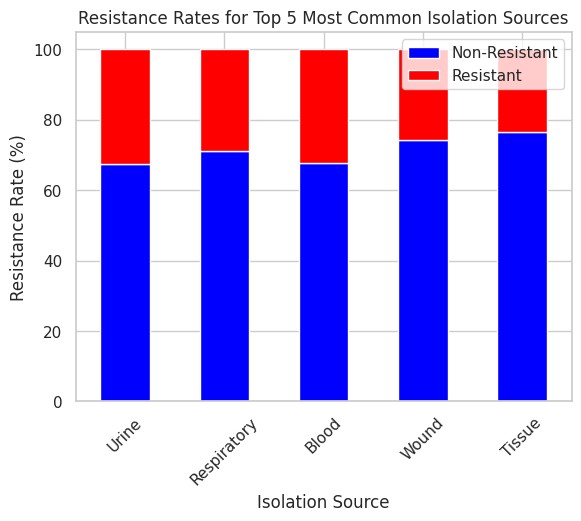

In [ ]:
# Plotting the results
plt.figure(figsize=(12, 8))
top_5_resistance_rates.plot(kind='bar', stacked=True, color=['blue', 'red'])
plt.title('Resistance Rates for Top 5 Most Common Isolation Sources')
plt.xlabel('Isolation Source')
plt.ylabel('Resistance Rate (%)')
plt.legend(['Non-Resistant', 'Resistant'])
plt.xticks(rotation=45)
plt.show()

Based on the analysis of the most common isolation sources for resistant versus non-resistant isolates, the findings are summarized as follows:

**Top 5 Most Common Isolation Sources:**
- **Urine:** 820 isolates
- **Respiratory:** 260 isolates
- **Blood:** 173 isolates
- **Wound:** 97 isolates
- **Tissue:** 30 isolates

**Resistance Rates for Top 5 Isolation Sources:**
- **Urine:**
  - Non-Resistant: **67.56%**
  - Resistant: **32.44%**
- **Respiratory:**
  - Non-Resistant: **71.15%**
  - Resistant: **28.85%**
- **Blood:**
  - Non-Resistant: **67.63%**
  - Resistant: **32.37%**
- **Wound:**
  - Non-Resistant: **74.23%**
  - Resistant: **25.77%**
- **Tissue:**
  - Non-Resistant: **76.67%**
  - Resistant: **23.33%**

### Conclusion

The analysis indicates that **Urine** is the most common isolation source, followed by **Respiratory** and **Blood**. The resistance rates vary across these sources, with **Urine** showing a resistance rate of **32.44%**, while **Tissue** shows a lower resistance rate of **23.33%**. These insights can help in understanding the distribution and prevalence of resistance across different isolation sources.

## Country Analysis

## Country Analysis

#### Resistance Gene Patterns in Pakistani Isolates

In [ ]:
pakistani_isolates = eda_data[eda_data["Isolation Country"] == "Pakistan"]
resistance_gene_columns = [col for col in eda_data.columns if col not in ["GC Content", "CDS", "Isolation Source", "Isolation Country", "Resistant Phenotype"]]

# the frequency of each resistance gene in Pakistani isolates
pakistani_gene_frequencies = pakistani_isolates[resistance_gene_columns].sum().sort_values(ascending=False)
pakistani_gene_frequencies.head(20)

,0
Resistance Gene Count,2310
oqxA,108
Klebsiella_pneumoniae_KpnG,108
Klebsiella_pneumoniae_OmpK37,108
Klebsiella_pneumoniae_acrA,108
Klebsiella_pneumoniae_KpnE,108
Klebsiella_pneumoniae_KpnF,108
oqxB,107
CTX-M-15,107
TEM-1,103


In [ ]:
# frequency of each resistance gene in Pakistani isolates in percentage
total_pakistani_isolates = len(pakistani_isolates)
pakistani_gene_frequencies = (pakistani_isolates[resistance_gene_columns].sum() / total_pakistani_isolates * 100).sort_values(ascending=False)

# top 20 resistance genes
print(pakistani_gene_frequencies.head(20))


Resistance Gene Count           2138.888889
oqxA                             100.000000
Klebsiella_pneumoniae_KpnG       100.000000
Klebsiella_pneumoniae_OmpK37     100.000000
Klebsiella_pneumoniae_acrA       100.000000
Klebsiella_pneumoniae_KpnE       100.000000
Klebsiella_pneumoniae_KpnF       100.000000
oqxB                              99.074074
CTX-M-15                          99.074074
TEM-1                             95.370370
sul2                              95.370370
APH(6)-Id                         91.666667
APH(3'')-Ib                       91.666667
FosA6                             89.814815
dfrA14                            85.185185
QnrB17                            80.555556
sul1                              64.814815
tet(A)                            62.962963
armA                              54.629630
AAC(3)-IIe                        51.851852
dtype: float64


In [ ]:
# isolates from countries other than Pakistan
non_pakistani_isolates = eda_data[eda_data["Isolation Country"] != "Pakistan"]
resistance_gene_columns = [col for col in eda_data.columns if col not in ["GC Content", "CDS", "Isolation Source", "Isolation Country", "Resistant Phenotype"]]

# frequency of each resistance gene in non-Pakistani isolates
non_pakistani_gene_frequencies = non_pakistani_isolates[resistance_gene_columns].sum().sort_values(ascending=False)

# frequencies for the top resistance genes identified in Pakistani isolates
top_pakistani_genes = ["Klebsiella_pneumoniae_KpnF", "Klebsiella_pneumoniae_KpnG", "Klebsiella_pneumoniae_OmpK37",
                       "Klebsiella_pneumoniae_acrA", "oqxA", "Klebsiella_pneumoniae_KpnE", "oqxB", "CTX-M-15",
                       "sul2", "TEM-1", "APH(6)-Id", "APH(3'')-Ib", "FosA6", "dfrA14", "QnrB17", "sul1",
                       "tet(A)", "armA", "AAC(3)-IIe", "OXA-1"]

non_pakistani_top_genes_frequencies = non_pakistani_gene_frequencies[top_pakistani_genes]

# the frequencies of the top resistance genes in non-Pakistani isolates
print(non_pakistani_top_genes_frequencies)


Klebsiella_pneumoniae_KpnF      1472
Klebsiella_pneumoniae_KpnG      1463
Klebsiella_pneumoniae_OmpK37    1452
Klebsiella_pneumoniae_acrA      1472
oqxA                            1429
Klebsiella_pneumoniae_KpnE      1459
oqxB                            1415
CTX-M-15                         863
sul2                             477
TEM-1                            417
APH(6)-Id                        472
APH(3'')-Ib                      470
FosA6                           1272
dfrA14                           553
QnrB17                           230
sul1                             633
tet(A)                           343
armA                              19
AAC(3)-IIe                       471
OXA-1                            360
dtype: int64


In [ ]:
# frequency of each resistance gene in non-Pakistani isolates in percentage
total_non_pakistani_isolates = len(non_pakistani_isolates)
non_pakistani_gene_frequencies = (non_pakistani_isolates[resistance_gene_columns].sum() / total_non_pakistani_isolates * 100).sort_values(ascending=False)

# frequencies for the top resistance genes identified in Pakistani isolates
top_pakistani_genes = ["Klebsiella_pneumoniae_KpnF", "Klebsiella_pneumoniae_KpnG", "Klebsiella_pneumoniae_OmpK37",
                       "Klebsiella_pneumoniae_acrA", "oqxA", "Klebsiella_pneumoniae_KpnE", "oqxB", "CTX-M-15",
                       "sul2", "TEM-1", "APH(6)-Id", "APH(3'')-Ib", "FosA6", "dfrA14", "QnrB17", "sul1",
                       "tet(A)", "armA", "AAC(3)-IIe", "OXA-1"]
non_pakistani_top_genes_frequencies = non_pakistani_gene_frequencies[top_pakistani_genes]

# the frequencies of the top resistance genes in non-Pakistani isolates
print(non_pakistani_top_genes_frequencies)


Klebsiella_pneumoniae_KpnF      100.000000
Klebsiella_pneumoniae_KpnG       99.388587
Klebsiella_pneumoniae_OmpK37     98.641304
Klebsiella_pneumoniae_acrA      100.000000
oqxA                             97.078804
Klebsiella_pneumoniae_KpnE       99.116848
oqxB                             96.127717
CTX-M-15                         58.627717
sul2                             32.404891
TEM-1                            28.328804
APH(6)-Id                        32.065217
APH(3'')-Ib                      31.929348
FosA6                            86.413043
dfrA14                           37.567935
QnrB17                           15.625000
sul1                             43.002717
tet(A)                           23.301630
armA                              1.290761
AAC(3)-IIe                       31.997283
OXA-1                            24.456522
dtype: float64


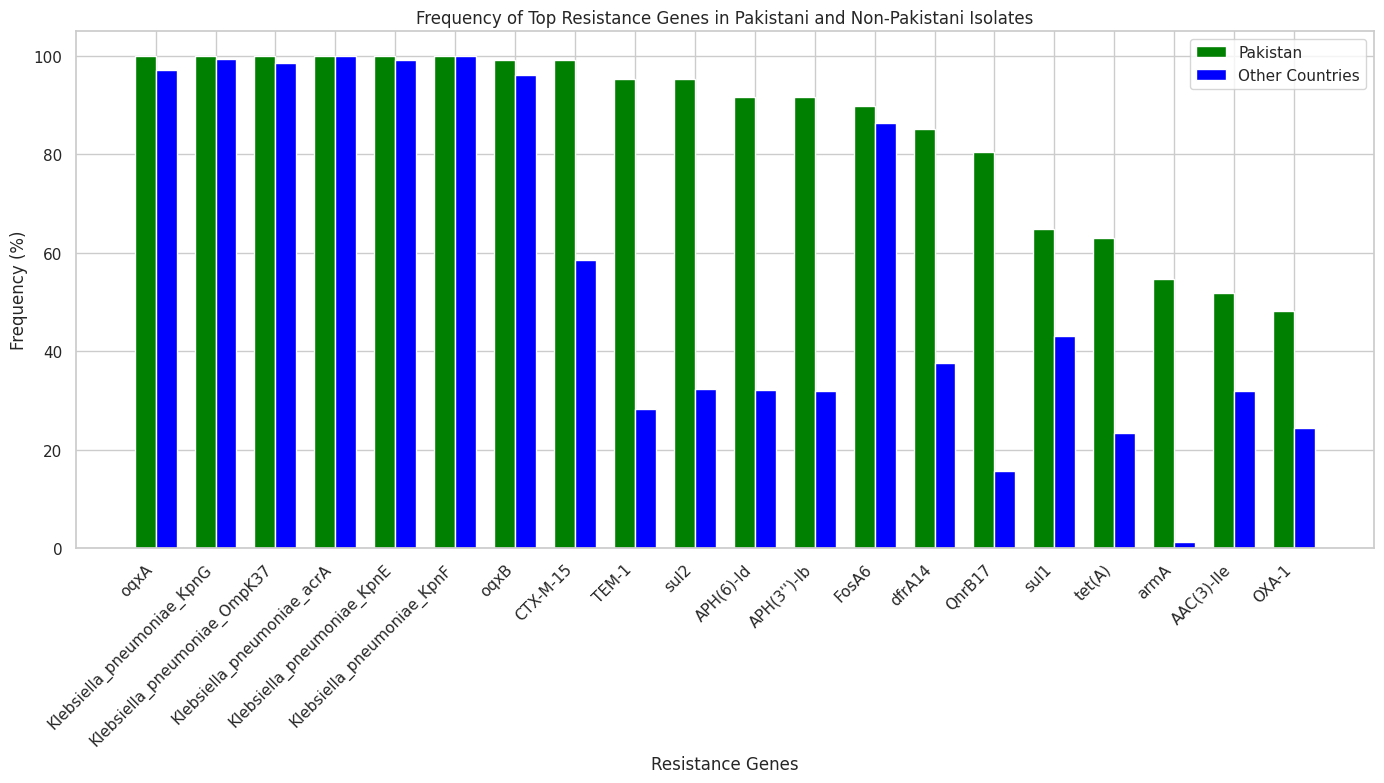

In [ ]:
# converting the series to a DataFrame for better handling
pakistani_gene_frequencies_df = pakistani_gene_frequencies.reset_index()
pakistani_gene_frequencies_df.columns = ['Gene', 'Frequency_Pakistan']

non_pakistani_top_genes_frequencies_df = non_pakistani_top_genes_frequencies.reset_index()
non_pakistani_top_genes_frequencies_df.columns = ['Gene', 'Frequency_Other_Countries']

# Merging the two DataFrames on the Gene column
combined_frequencies_df = pd.merge(pakistani_gene_frequencies_df, non_pakistani_top_genes_frequencies_df, on='Gene')

# Plotting the results
plt.figure(figsize=(14, 8))
bar_width = 0.35

# Bar positions
index = range(len(combined_frequencies_df))

# Creating bar plots
plt.bar(index, combined_frequencies_df['Frequency_Pakistan'], bar_width, label='Pakistan', color='green')
plt.bar([i + bar_width for i in index], combined_frequencies_df['Frequency_Other_Countries'], bar_width, label='Other Countries', color='blue')

# Adding labels and title
plt.xlabel('Resistance Genes')
plt.ylabel('Frequency (%)')
plt.title('Frequency of Top Resistance Genes in Pakistani and Non-Pakistani Isolates')
plt.xticks([i + bar_width / 2 for i in index], combined_frequencies_df['Gene'], rotation=45, ha='right')
plt.legend()

# Showing plot
plt.tight_layout()
plt.show()

The most frequently present resistance genes in Pakistani isolates include:
- **Klebsiella pneumoniae KpnF:** Present in 108 isolates.
- **Klebsiella pneumoniae KpnG:** Present in 108 isolates.
- **Klebsiella pneumoniae OmpK37:** Present in 108 isolates.
- **Klebsiella pneumoniae acrA:** Present in 108 isolates.
- **oqxA:** Present in 108 isolates.
- **Klebsiella pneumoniae KpnE:** Present in 108 isolates.
- **oqxB:** Present in 107 isolates.
- **CTX-M-15:** Present in 107 isolates.
- **sul2:** Present in 103 isolates.
- **TEM-1:** Present in 103 isolates.

#### Resistance Gene Functions and Comparisons

**Klebsiella pneumoniae KpnF, KpnG, OmpK37, acrA, KpnE**

- **Function:** These genes are involved in various mechanisms of antibiotic resistance in Klebsiella pneumoniae, including efflux pumps, outer membrane porins, and other resistance mechanisms.
- **Pakistan:** 100.00%
- **Other Countries:** KpnF: 100.00%, KpnG: 99.39%, OmpK37: 98.64%, acrA: 100.00%, KpnE: 99.12%

**oqxA, oqxB**

- **Function:** These genes encode efflux pumps that expel antibiotics out of the bacterial cell, contributing to resistance.
- **Pakistan:** oqxA: 100.00%, oqxB: 99.07%
- **Other Countries:** oqxA: 97.08%, oqxB: 96.13%

**CTX-M-15**

- **Function:** Encodes a beta-lactamase enzyme that hydrolyzes cephalosporins, providing resistance to these antibiotics.
- **Pakistan:** 99.07%
- **Other Countries:** 58.63%

**sul2, sul1**

- **Function:** These genes provide resistance to sulfonamides by encoding enzymes that bypass the inhibition of folic acid synthesis.
- **Pakistan:** sul2: 95.37%, sul1: 64.81%
- **Other Countries:** sul2: 32.40%, sul1: 43.00%

**TEM-1**

- **Function:** Produces a beta-lactamase enzyme that confers resistance to penicillins.
- **Pakistan:** 95.37%
- **Other Countries:** 28.33%

**APH(6)-Id, APH(3'')-Ib**

- **Function:** These genes encode enzymes that modify aminoglycosides, rendering them ineffective.
- **Pakistan:** APH(6)-Id: 91.67%, APH(3'')-Ib: 91.67%
- **Other Countries:** APH(6)-Id: 32.07%, APH(3'')-Ib: 31.93%

**FosA6**

- **Function:** Encodes an enzyme that inactivates fosfomycin, leading to resistance.
- **Pakistan:** 89.81%
- **Other Countries:** 86.41%

**dfrA14**

- **Function:** Encodes a dihydrofolate reductase enzyme resistant to trimethoprim.
- **Pakistan:** 85.19%
- **Other Countries:** 37.57%

**QnrB17**

- **Function:** Provides resistance to quinolones by protecting bacterial DNA gyrase and topoisomerase IV from the action of quinolones.
- **Pakistan:** 80.56%
- **Other Countries:** 15.63%

**tet(A)**

- **Function:** Encodes an efflux pump that expels tetracyclines out of the bacterial cell.
- **Pakistan:** 62.96%
- **Other Countries:** 23.30%

**armA**

- **Function:** Encodes a methyltransferase that modifies the bacterial ribosome, leading to resistance to aminoglycosides.
- **Pakistan:** 54.63%
- **Other Countries:** 1.29%

**AAC(3)-IIe**

- **Function:** Encodes an enzyme that acetylates aminoglycosides, leading to resistance.
- **Pakistan:** 51.85%
- **Other Countries:** 32.00%

**OXA-1**

- **Function:** Encodes a beta-lactamase enzyme that provides resistance to penicillins.
- **Pakistan:** 48.15%
- **Other Countries:** 24.46%

### Comparison Between Pakistani and Non-Pakistani Isolates

- The frequencies of certain genes, such as Klebsiella pneumoniae genes, oqxA, oqxB, and CTX-M-15, are notably high in both Pakistani and non-Pakistani isolates.
- Some genes, like armA, show significantly higher prevalence in Pakistani isolates (54.63%) compared to non-Pakistani isolates (1.29%).
- Overall, the patterns indicate that while many resistance genes are commonly found in both groups, the prevalence rates can vary significantly, suggesting different selective pressures or sources of resistance in Pakistani isolates compared to isolates from other countries.

These insights can inform targeted strategies to manage and mitigate antibiotic resistance in different regions.



### Resistance Phenotypes Between Countries

In [ ]:
countries = eda_data['Isolation Country'].unique()
countries

array(['USA', 'Colombia', 'Italy', 'Unknown', 'Afghanistan', 'Honduras',
       'Germany', 'Greece', 'Brazil', 'Pakistan'], dtype=object)

In [ ]:
#the number of strains from each country
strains_per_country = eda_data['Isolation Country'].value_counts()
print(strains_per_country)


Isolation Country
USA            1421
Pakistan        108
Greece           20
Italy            19
Unknown           5
Honduras          2
Brazil            2
Colombia          1
Afghanistan       1
Germany           1
Name: count, dtype: int64


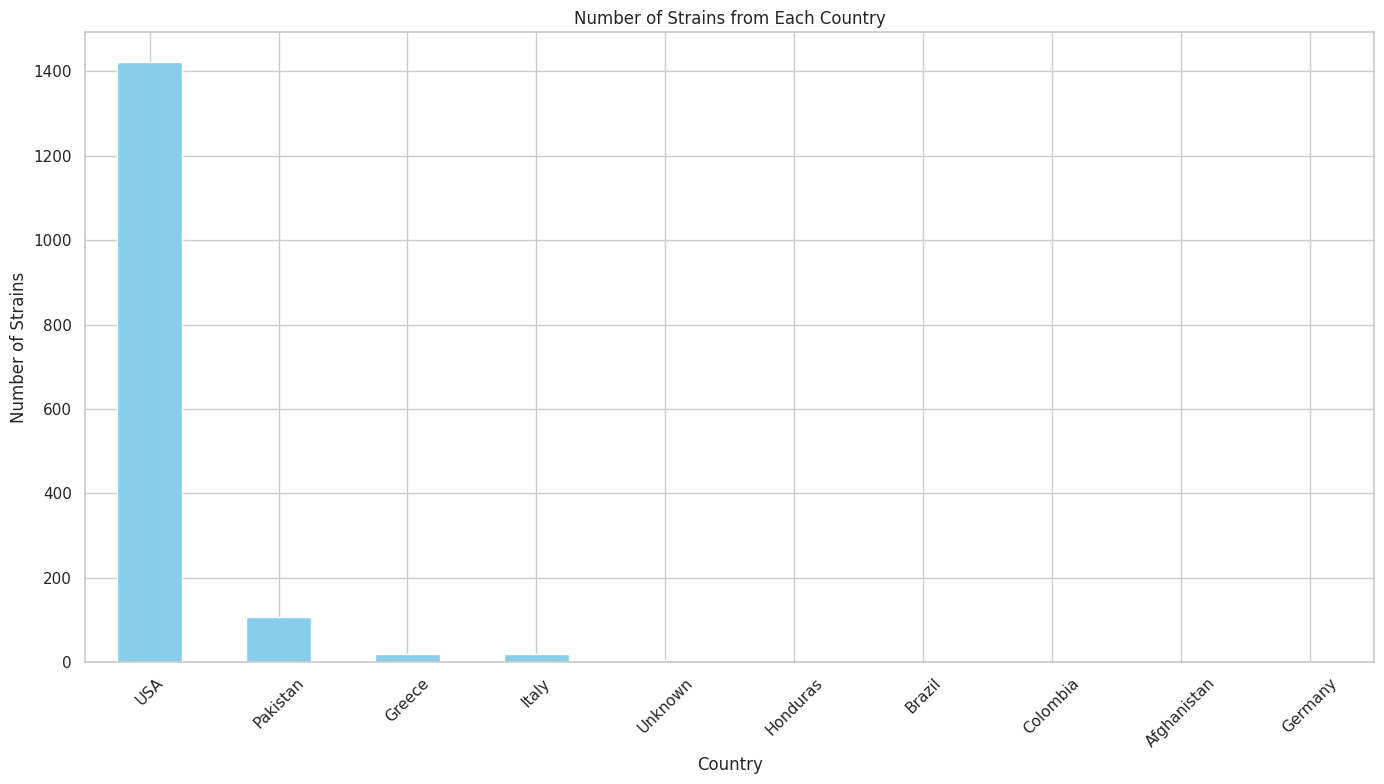

In [ ]:
# Plotting the number of strains for each country
plt.figure(figsize=(14, 8))
strains_per_country.plot(kind='bar', color='skyblue')
plt.title('Number of Strains from Each Country')
plt.xlabel('Country')
plt.ylabel('Number of Strains')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Splitting the dataset into isolates from Pakistan and other countries
pakistan_isolates = eda_data[eda_data['Isolation Country'] == 'Pakistan']
other_isolates = eda_data[eda_data['Isolation Country'] != 'Pakistan']

resistance_summary = {
    'Pakistan': pakistan_isolates['Resistant Phenotype'].value_counts(normalize=True),
    'Other Countries': other_isolates['Resistant Phenotype'].value_counts(normalize=True),
}

resistance_summary

{'Pakistan': Resistant Phenotype
 0    0.824074
 1    0.175926
 Name: proportion, dtype: float64,
 'Other Countries': Resistant Phenotype
 0    0.655571
 1    0.344429
 Name: proportion, dtype: float64}

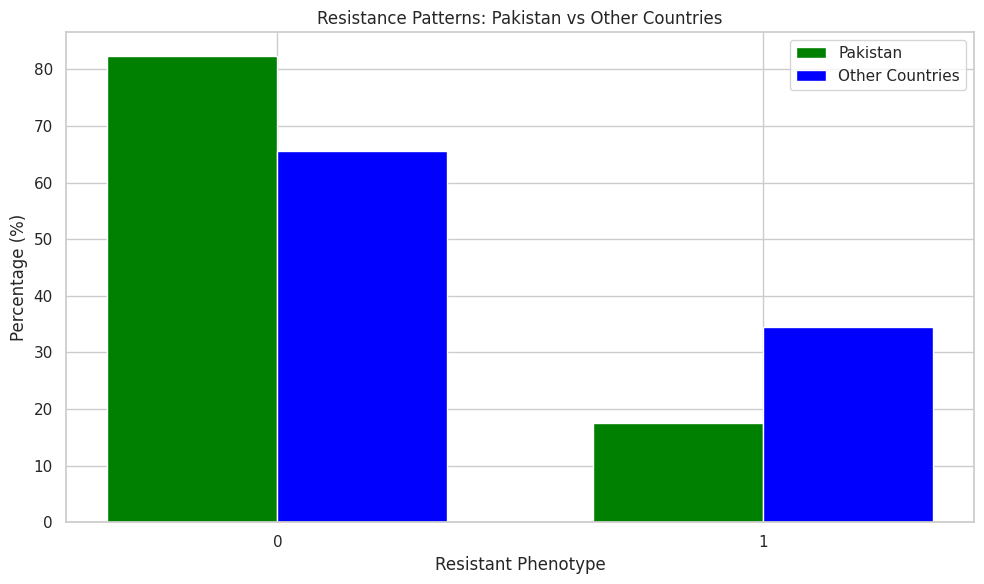

In [ ]:
# Summarizinf resistance phenotypes for each group
resistance_summary = {
    'Pakistan': pakistan_isolates['Resistant Phenotype'].value_counts(normalize=True) * 100,
    'Other Countries': other_isolates['Resistant Phenotype'].value_counts(normalize=True) * 100,
}
# Creating a DataFrame from the summary
resistance_df = pd.DataFrame(resistance_summary).reset_index()
resistance_df.columns = ['Resistant Phenotype', 'Pakistan', 'Other Countries']

# Plotting the resistance patterns
plt.figure(figsize=(10, 6))
bar_width = 0.35

# Bar positions
index = range(len(resistance_df))

# Creating bar plots
plt.bar(index, resistance_df['Pakistan'], bar_width, label='Pakistan', color='green')
plt.bar([i + bar_width for i in index], resistance_df['Other Countries'], bar_width, label='Other Countries', color='blue')

# Adding labels and title
plt.xlabel('Resistant Phenotype')
plt.ylabel('Percentage (%)')
plt.title('Resistance Patterns: Pakistan vs Other Countries')
plt.xticks([i + bar_width / 2 for i in index], resistance_df['Resistant Phenotype'], rotation=0)
plt.legend()

# Showing plot
plt.tight_layout()
plt.show()


**Pakistan:**
- 82.4% of isolates are non-resistant (phenotype 0).
- 17.6% of isolates are resistant (phenotype 1).

**Other Countries:**
- 65.6% of isolates are non-resistant (phenotype 0).
- 34.4% of isolates are resistant (phenotype 1).

**Countries Included in the Analysis:**

- USA            1421
- Pakistan        108
- Greece           20
- Italy            19
- Unknown           5
- Honduras          2
- Brazil            2
- Colombia          1
- Afghanistan       1
- Germany           1

#### Conclusion
Isolates from Pakistan show a lower resistance rate compared to isolates from other countries. This indicates that Pakistani isolates tend to be less resistant overall, with a higher proportion of non-resistant isolates compared to the rest of the countries in the dataset.

#### Possible Reasons for Lower Resistance Rate in Pakistani Isolates
- **Sampling Bias:**
  - The dataset might reflect sampling biases where certain countries have a higher representation of isolates from specific sources (e.g., hospitals) that tend to have higher resistance rates.
- **Surveillance and Reporting:**
  - Countries with more comprehensive monitoring systems might report higher resistance rates simply due to better detection and documentation.
- **Other Factors:**
  - Environmental conditions, socioeconomic factors, and genetic diversity. (Inconclusive and need further research).

# 4-	Feature Engineering

## Feature and Target Split

In [ ]:
ml_data.head()

,AAC(3)-IId,AAC(3)-IIe,AAC(3)-IV,AAC(3)-Ia,AAC(6')-29a,AAC(6')-33,AAC(6')-IIa,AAC(6')-IIc,AAC(6')-Ib-cr,AAC(6')-Ib10,...,sul3,tet(A),tet(B),tet(C),tet(D),tet(G),tet(W/N/W),tetM,tetW,Resistant Phenotype
0,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
X = ml_data.drop('Resistant Phenotype', axis=1)  # Features
y = ml_data['Resistant Phenotype']  # Target

In [ ]:
X.shape

(1580, 195)

In [ ]:
y.shape

(1580,)

## Removing Low Variance Features

In [ ]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)

In [ ]:
X.shape

(1580, 19)

#5- Model Training

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train.shape, y_train.shape

((1264, 19), (1264,))

In [ ]:
X_test.shape, y_test.shape

((316, 19), (316,))

## Models and hyperparameter grids

In [ ]:
# Models and hyperparameter grids
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "k-NN": KNeighborsClassifier(),
    "Neural Network": MLPClassifier(max_iter=1000)
}

param_grids = {
    "Logistic Regression": {'C': [0.01, 0.1, 1, 10, 100]},
    "Decision Tree": {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]},
    "Random Forest": {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]},
    "SVM": {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    "k-NN": {'n_neighbors': [3, 5, 7, 9]},
    "Neural Network": {'hidden_layer_sizes': [(50,), (100,), (50, 50)], 'alpha': [0.0001, 0.001]}
}

In [ ]:
# Training and evaluating each model
best_models = {}
results = []

for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    if model_name in param_grids:
        grid_search = GridSearchCV(model, param_grids[model_name], cv=StratifiedKFold(5), scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_models[model_name] = grid_search.best_estimator_
        print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    else:
        model.fit(X_train, y_train)
        best_models[model_name] = model

    # Evaluating the model
    y_pred = best_models[model_name].predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    clf_report = classification_report(y_test, y_pred, output_dict=True)

    # Storing results for summary
    results.append({
        "Model": model_name,
        "Accuracy": acc * 100,
        "Precision": clf_report['weighted avg']['precision'],
        "Recall": clf_report['weighted avg']['recall'],
        "F1-Score": clf_report['weighted avg']['f1-score']
    })


Training Logistic Regression...
Best parameters for Logistic Regression: {'C': 100}

Training Decision Tree...
Best parameters for Decision Tree: {'max_depth': 30, 'min_samples_split': 2}

Training Random Forest...
Best parameters for Random Forest: {'max_depth': 10, 'n_estimators': 200}

Training SVM...
Best parameters for SVM: {'C': 10, 'kernel': 'rbf'}

Training k-NN...
Best parameters for k-NN: {'n_neighbors': 9}

Training Neural Network...
Best parameters for Neural Network: {'alpha': 0.001, 'hidden_layer_sizes': (100,)}


## Evaluation

In [ ]:
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Accuracy', ascending=False)
results_df

,Model,Accuracy,Precision,Recall,F1-Score
5,Neural Network,87.658228,0.875839,0.876582,0.876124
2,Random Forest,87.341772,0.872001,0.873418,0.871718
4,k-NN,87.341772,0.872405,0.873418,0.870929
0,Logistic Regression,86.708861,0.870560,0.867089,0.861555
1,Decision Tree,86.075949,0.859303,0.860759,0.859688
3,SVM,86.075949,0.860153,0.860759,0.860418


#6- Optimatization and Validation

In [ ]:
df = ml_data

In [ ]:
# Separating features and target variable
X = df.drop(columns=['Resistant Phenotype'])
y = df['Resistant Phenotype']

In [ ]:
# Handling class imbalance using random oversampling
df_majority = df[df['Resistant Phenotype'] == 0]
df_minority = df[df['Resistant Phenotype'] == 1]

df_minority_upsampled = resample(
    df_minority,
    replace=True,
    n_samples=len(df_majority),
    random_state=42
)
df_balanced = pd.concat([df_majority, df_minority_upsampled])

X = df_balanced.drop(columns=['Resistant Phenotype'])
y = df_balanced['Resistant Phenotype']

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Models and hyperparameter grids

In [ ]:
# Models and hyperparameter grids
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "k-NN": KNeighborsClassifier(),
    "Neural Network": MLPClassifier(max_iter=1000)
}

param_grids = {
    "Logistic Regression": {'C': [0.01, 0.1, 1, 10, 100]},
    "Decision Tree": {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]},
    "Random Forest": {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]},
    "SVM": {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    "k-NN": {'n_neighbors': [3, 5, 7, 9]},
    "Neural Network": {'hidden_layer_sizes': [(50,), (100,), (50, 50)], 'alpha': [0.0001, 0.001]}
}

In [ ]:
# Training and evaluating each model
best_models = {}
results = []

for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    if model_name in param_grids:
        grid_search = GridSearchCV(model, param_grids[model_name], cv=StratifiedKFold(5), scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_models[model_name] = grid_search.best_estimator_
        print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    else:
        model.fit(X_train, y_train)
        best_models[model_name] = model

    # Evaluating the model
    y_pred = best_models[model_name].predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    clf_report = classification_report(y_test, y_pred, output_dict=True)

    # Storing results for summary
    results.append({
        "Model": model_name,
        "Accuracy": acc * 100,
        "Precision": clf_report['weighted avg']['precision'],
        "Recall": clf_report['weighted avg']['recall'],
        "F1-Score": clf_report['weighted avg']['f1-score']
    })


Training Logistic Regression...
Best parameters for Logistic Regression: {'C': 1}

Training Decision Tree...
Best parameters for Decision Tree: {'max_depth': None, 'min_samples_split': 2}

Training Random Forest...
Best parameters for Random Forest: {'max_depth': None, 'n_estimators': 100}

Training SVM...
Best parameters for SVM: {'C': 10, 'kernel': 'rbf'}

Training k-NN...
Best parameters for k-NN: {'n_neighbors': 3}

Training Neural Network...
Best parameters for Neural Network: {'alpha': 0.0001, 'hidden_layer_sizes': (100,)}


## Evaluation

In [ ]:
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Accuracy', ascending=False)
results_df

,Model,Accuracy,Precision,Recall,F1-Score
2,Random Forest,93.601896,0.936264,0.936019,0.936010
1,Decision Tree,93.127962,0.931755,0.931280,0.931261
3,SVM,92.890995,0.929527,0.928910,0.928884
5,Neural Network,92.890995,0.929257,0.928910,0.928896
0,Logistic Regression,91.706161,0.917521,0.917062,0.917039
4,k-NN,90.995261,0.909989,0.909953,0.909951


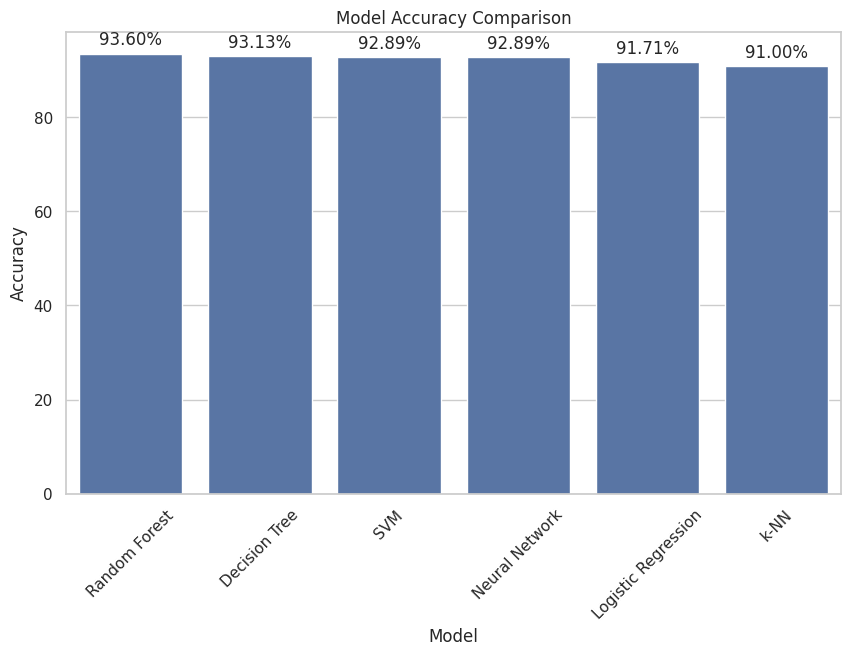

In [ ]:
# plot style
sns.set(style="whitegrid")

# Plotting the evaluation results with accuracy percentages
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="Model", y="Accuracy", data=results_df)

# Adding accuracy percentages on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')

plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.show()

##Cross-validation and evaluation for the best model (Random Forest)

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

best_model = RandomForestClassifier(max_depth=None, n_estimators=100)

# Cross-validation
cv = StratifiedKFold(n_splits=5)
cv_scores = cross_val_score(best_model, X_train, y_train, cv=cv, scoring='accuracy')

# cross-validation scores
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {np.mean(cv_scores):.4f}")

Cross-validation scores: [0.94674556 0.95252226 0.94065282 0.95548961 0.94065282]
Mean cross-validation score: 0.9472


In [ ]:
# Fitting the best model
best_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = best_model.predict(X_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification report
clf_report = classification_report(y_test, y_pred)
acc_score = accuracy_score(y_test, y_pred)

print(f"Accuracy: {acc_score:.2f}")
print("Classification Report:\n", clf_report)

Accuracy: 0.93
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93       211
           1       0.91      0.96      0.93       211

    accuracy                           0.93       422
   macro avg       0.93      0.93      0.93       422
weighted avg       0.93      0.93      0.93       422



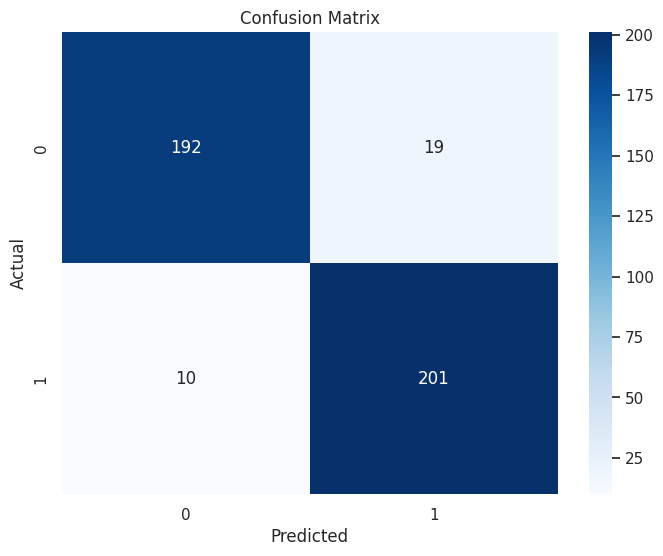

In [ ]:
# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# 7- Results Interpretation

### Model Selection and Hyperparameter Tuning
Several machine learning models are evaluated, including:
- **Logistic Regression**: Tuned `'C'` parameter.
- **Decision Tree**: Tuned `'max_depth'` and `'min_samples_split'` parameters.
- **Random Forest**: Tuned `'n_estimators'` and `'max_depth'` parameters.
- **SVM**: Tuned `'C'` and `'kernel'` parameters.
- **k-NN**: Tuned `'n_neighbors'` parameter.
- **Neural Network**: Tuned `'hidden_layer_sizes'` and `'alpha'` parameters.

For each model, a hyperparameter grid is defined, and `GridSearchCV` is used to perform cross-validated hyperparameter tuning. The best parameters for each model are determined through this process.

### Model Evaluation
The models are evaluated based on their performance on the test set using the following metrics:
- **Accuracy**: The proportion of correctly predicted instances.
- **Precision**: The proportion of true positive predictions out of all positive predictions.
- **Recall**: The proportion of true positive predictions out of all actual positive instances.
- **F1-Score**: The harmonic mean of precision and recall.

The results are summarized in a DataFrame and visualized using a bar plot to compare the accuracy of each model.  
The **Random Forest** model achieved the highest accuracy at approximately **93.60%**, followed closely by Decision Tree, SVM, Neural Network, Logistic Regression, and k-NN.

### Cross-Validation of the Best Model
**Random Forest** is identified as the best model based on accuracy.  
Cross-validation is performed using `StratifiedKFold` with 5 splits to ensure the model's robustness.  
The cross-validation scores show consistent high performance with a mean score of approximately **0.9476**.

### Final Evaluation
The final **Random Forest** model is fitted on the training data and evaluated on the test data:
- The classification report shows high **precision**, **recall**, and **F1-scores**, indicating good performance.
- The confusion matrix is visualized to illustrate the model's predictive capability, showing balanced performance between both classes of the target variable.


# 8- Conclusion

- This study effectively demonstrated the utility of machine learning in predicting antimicrobial resistance (AMR) in Klebsiella pneumoniae.

- EDA showed that Pakistani isolates exhibited a lower overall resistance rate compared to isolates from other regions, potentially influenced by sampling bias or environmental factors

- The **Random Forest** model proved to be the most effective in predicting the "Resistant Phenotype," with strong cross-validation and test performance.  

- The hyperparameter tuning and model evaluation process ensured that the model was optimized for both **accuracy** and **reliability**.

- Insights from this research can contribute to understanding AMR patterns, especially in isolates from Pakistan.
